<a href="https://colab.research.google.com/github/amutharun/GenAIWorkshop/blob/main/Prompt_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

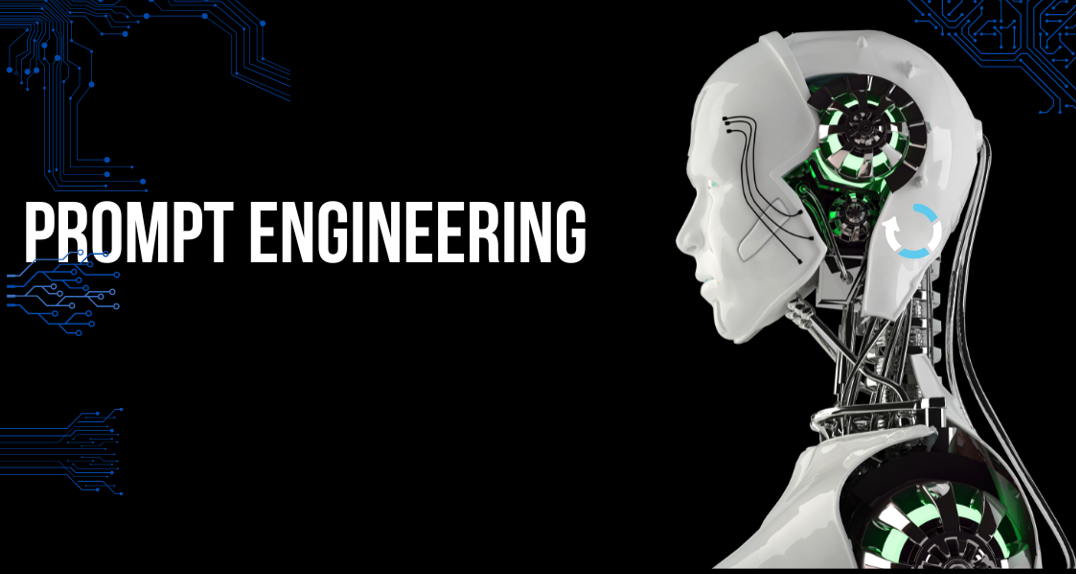

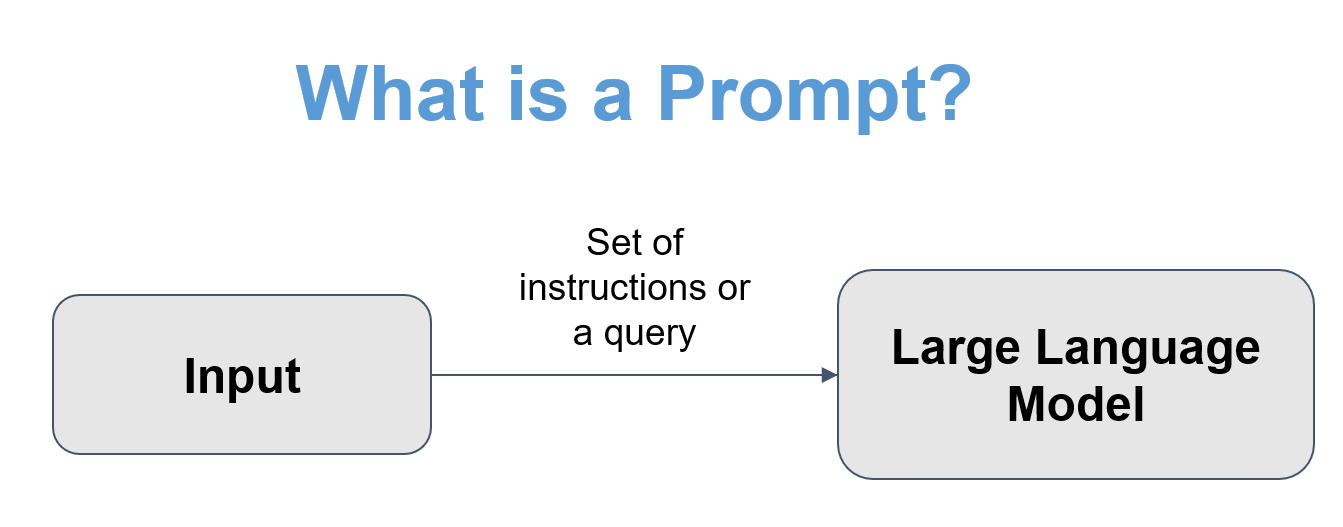

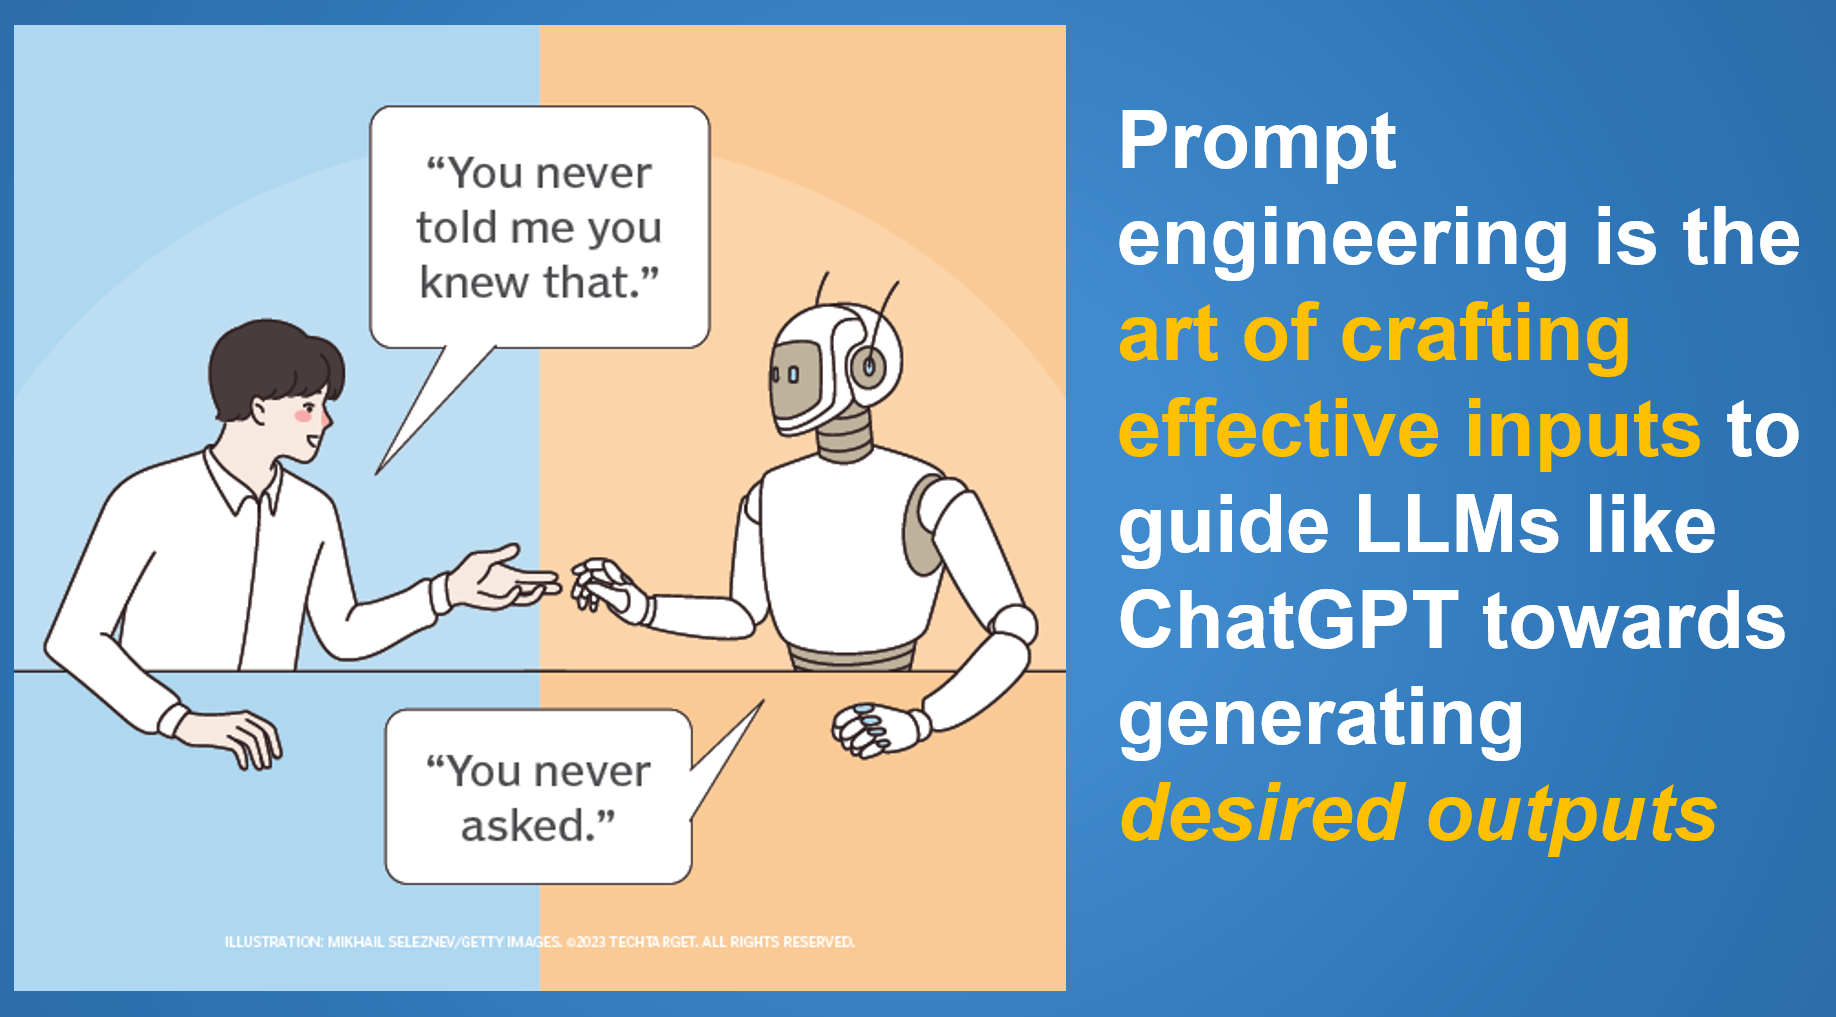

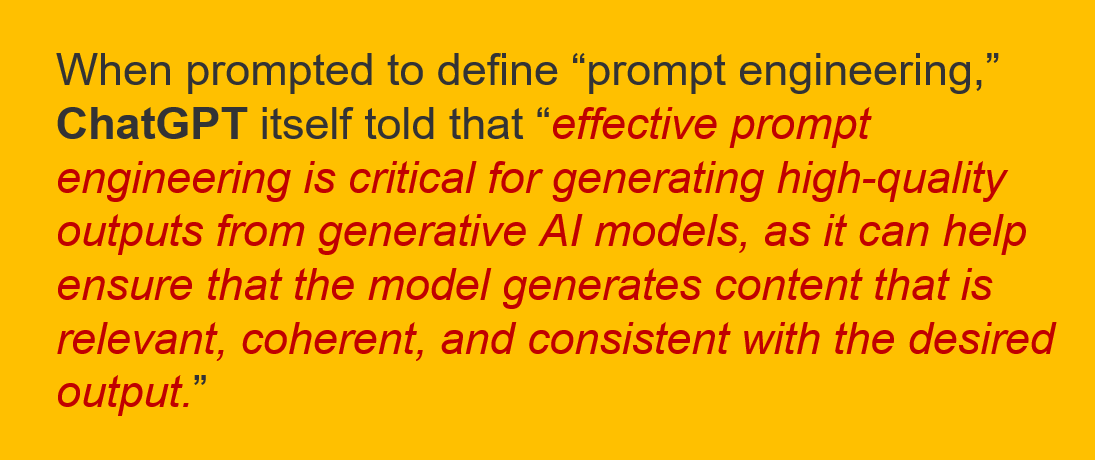

# Prompt Engineering

This notebook contains examples and exercises to learning about prompt engineering.

We will be using the [OpenAI APIs](https://platform.openai.com/) for all examples.

Below we are loading the necessary libraries, utilities, and configurations.

In [ ]:
!pip install openai langchain

In [ ]:
!pip install --upgrade python-dotenv

In [ ]:
# load env vars
from dotenv import load_dotenv
import os
import openai
load_dotenv()

# if directly using open ai api key
# openai.api_key = os.getenv("OPENAI_API_KEY")
# openai.api_type = "openai"

# if we are using the azure open ai deployed model
openai.api_type = "azure"
openai.api_version = os.getenv("AZURE_API_VERSION"),
openai.api_base = os.getenv("AZURE_OPENAI_ENDPOINT")  # Your Azure OpenAI resource's endpoint value.
openai.api_key = os.getenv("AZURE_OPENAI_API_KEY")

In [ ]:
# Set the names of model. Use deployed model names if Azure Open AI. Else use direct model names if using open ai
gpt4turbo_model = "EAGPT4"
chatgpt_model = "EAGPT35"

In [ ]:
import IPython
from langchain.llms import OpenAI

Load environment variables. You can use anything you like but I used `python-dotenv`. Just create a `.env` file with your `OPENAI_API_KEY` then load it.

In [ ]:
def askGPT(prompt, model = gpt4turbo_model, temperature = 0.5, max_tokens=250):
  """Function that takes prompt as input
  Default Args : model name = gpt4turbo model, temperature = 0.5, max_tokens=250
  rest all args of chat completions api are defaulted in the api call"""

  response = openai.chat.completions.create(
  model = model, #this is the name of the deployed model on Azure
  messages=[
    {
      "role": "user",
      "content": prompt
    }
  ],
  temperature = temperature,
  max_tokens=max_tokens,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
  )
  # Return a beautiful looking text
  return IPython.display.Markdown(response.choices[0].message.content)

In [ ]:
prompt = "Write a love letter from a potato to a tomato in 50 words"
askGPT(prompt)

Dear Tomato,

Our love is like the perfect stew, simmering slowly, blending beautifully. Your radiant red complements my earthy brown. Your sweetness balances my starchy solidity. Together, we create harmony. I am just a potato, but with you, I feel we can make the most exquisite dish of love.

Yours,
Potato

Basic prompt example:

In [ ]:
# basic example

prompt = "The sky is"
askGPT(prompt, temperature=0)

blue.

Try with different temperature to compare results:

In [ ]:
prompt = "The sky is"
askGPT(prompt, temperature=1)

a vast expanse that envelopes the earth, ranging in color from deep blue in the daytime to black at nighttime, dotted with the glow of stars. It often serves as a canvas for various weather phenomena such as clouds, rainbows, and storms. It also hosts a variety of celestial bodies, such as the sun, moon, and planets, which appear to move across it due to the earth's rotation.

### 1.1 Text Summarization

In [ ]:
prompt = """Compare article 1 and 2 provided below. Do you see anything that is conflicting?

<Article 1> Antibiotics are a type of medication used to treat bacterial infections.
They work by either killing the bacteria or preventing them from reproducing, allowing the body's immune system to fight off the infection.
Antibiotics are usually taken orally in the form of pills, capsules, or liquid solutions, or sometimes administered intravenously.
They are not effective against viral infections, and using them inappropriately can lead to antibiotic resistance.
</Article 1>

<Article 2> Antibiotics are a type of medication used to treat bacterial infections.
They work by either killing the cats and aliens or preventing them from reproducing, allowing the body's immune system to fight off the infection.
Antibiotics are usually taken orally in the form of pills, capsules, or liquid solutions, or sometimes administered intravenously.
They are not effective against viral infections, and using them inappropriately can lead to antibiotic resistance.
</Article 2>
"""

askGPT(prompt)


Yes, there is a conflict between the two articles. Article 1 correctly states that antibiotics work by killing the bacteria or preventing them from reproducing. However, Article 2 incorrectly states that antibiotics work by killing cats and aliens, which is not accurate.

Exercise: Instruct the model to explain the paragraph in one sentence like "I am 5". Do you see any differences?

In [ ]:
prompt = """Antibiotics are a type of medication used to treat bacterial infections.
They work by either killing the bacteria or preventing them from reproducing, allowing the body's immune system to fight off the infection.
Antibiotics are usually taken orally in the form of pills, capsules, or liquid solutions, or sometimes administered intravenously.
They are not effective against viral infections, and using them inappropriately can lead to antibiotic resistance.

Explain the above like I'm 5:"""

askGPT(prompt)

Antibiotics are a kind of medicine that helps your body fight off bad germs called bacteria. They can either kill the bacteria or stop them from making more bacteria. You usually take antibiotics by swallowing a pill, a capsule, or a liquid, but sometimes they can be given through a needle into your veins. These medicines can't fight viruses, which are a different kind of germ. If we use antibiotics when we don't need them, they might not work as well in the future.

### 1.2 Question Answering

In [ ]:
prompt = """
Answer the question based on the context below. Keep the answer short and concise.
Respond "Unsure about answer" if not sure about the answer.

Context: Teplizumab traces its roots to a New Jersey drug company called Ortho Pharmaceutical.
There, scientists generated an early version of the antibody, dubbed OKT3.
Originally sourced from snake, the molecule was able to bind to the surface of T cells and limit their cell-killing potential.
In 1986, it was approved to help prevent organ rejection after kidney transplants, making it the first therapeutic antibody allowed for human use.

Question: What was OKT3 originally sourced from?

Answer:"""

askGPT(prompt)


OKT3 was originally sourced from snake.

Context obtained from here: https://www.nature.com/articles/d41586-023-00400-x

Exercise: Edit prompt and get the model to respond that it isn't sure about the answer.

### 1.3 Text Classification

In [ ]:
prompt = """Classify the text into neutral, negative or positive.

Text 1: The movie was bloody good
Text 2: The movie was so nice that I walked out in 1 minute
Text 3: Inspite of haters trying to put down Leo, it still managed to break the box office collections of Jailer.
Text 4: His last movie was great

Sentiment: Provide the sentiment and the reason"""

In [ ]:
# Let's ask ChatGPT
askGPT(prompt, model= chatgpt_model)

Text 1: Positive - The reason for the positive sentiment is the use of the phrase "bloody good" which indicates a high level of satisfaction or enjoyment.

Text 2: Negative - The reason for the negative sentiment is the phrase "walked out in 1 minute" which suggests that the person did not enjoy the movie and left early.

Text 3: Neutral - The reason for the neutral sentiment is that it simply states a fact about the movie's box office collections without expressing any personal opinion or emotion.

Text 4: Positive - The reason for the positive sentiment is the use of the word "great" to describe the last movie, indicating a high level of satisfaction or enjoyment.

In [ ]:
# Let's ask GPT 4 Turbo
askGPT(prompt, model= gpt4turbo_model)

Text 1: Positive - The phrase "bloody good" is slang for very good, indicating a positive sentiment towards the movie.
Text 2: Negative - The phrase "walked out in 1 minute" indicates dissatisfaction with the movie, hence a negative sentiment.
Text 3: Positive - Despite the mention of "haters," the text indicates that the movie broke box office records, which is a positive outcome.
Text 4: Positive - The word "great" indicates a positive sentiment towards the last movie.

Exercise: Modify the prompt to instruct the model to provide an explanation to the answer selected.

### 1.4 Role Playing

In [ ]:
prompt = """The following is a conversation with an AI research assistant. The assistant tone is technical and scientific.

Human: Hello, who are you?
AI: Greeting! I am an AI research assistant. How can I help you today?
Human: Can you tell me about the creation of blackholes?
AI:"""

askGPT(prompt)

Absolutely, I'd be happy to explain. Black holes are created from remnants of massive stars. When such a star has burned out the nuclear fuel, it undergoes a catastrophic collapse under the force of gravity, leading to a supernova explosion. The core of the star collapses under gravity's pull, and if the core remaining after the supernova is more than about 3 times the mass of the Sun, the equations of general relativity predict a singularity, a region where the spacetime curvature becomes infinite. This singularity is surrounded by an event horizon, a boundary in spacetime through which matter and light can only pass inward towards the mass of the black hole. Nothing, not even light, can escape from inside the event horizon. The result is a black hole.

Exercise: Modify the prompt to instruct the model to keep AI responses concise and short.

### 1.5 Code Generation

In [ ]:
prompt = "\"\"\"\nTable departments, columns = [DepartmentId, DepartmentName]\nTable students, columns = [DepartmentId, StudentId, StudentName]\nCreate a MySQL query for all students in the Computer Science Department\n\"\"\""

askGPT(prompt)

SELECT students.StudentId, students.StudentName
FROM students
JOIN departments ON students.DepartmentId = departments.DepartmentId
WHERE departments.DepartmentName = 'Computer Science';

### 1.6 Reasoning

In [ ]:
prompt = """Say True or False. The odd numbers in this group add up to an even number: 15, 32, 5, 3, 13, 82, 7, 1, 1"""

askGPT(prompt, model=chatgpt_model)

True.

In [ ]:
prompt = """Say True or False. The odd numbers in this group add up to an even number: 15, 32, 5, 3, 13, 82, 7, 1, 1"""

askGPT(prompt, model=gpt4turbo_model)

True

In [ ]:
prompt = """Say True or False. The odd numbers in this group add up to an even number: 15, 32, 5, 3, 13, 82, 7, 1, 1

Solve by breaking the problem into steps. First, identify the odd numbers, add them, and indicate whether the result is odd or even. Finally say True or False"""

askGPT(prompt, model=gpt4turbo_model)

First, identify the odd numbers in the group: 15, 5, 3, 13, 7, 1, 1.

Next, add these numbers together: 15 + 5 + 3 + 13 + 7 + 1 + 1 = 45.

45 is an odd number.

So, the statement "The odd numbers in this group add up to an even number" is False.

Exercise: Improve the prompt to have a better structure and output format.

## 2. Advanced Prompting Techniques

Objectives:

- Cover more advanced techniques for prompting: few-shot, chain-of-thoughts,...

### 2.2 Few-shot prompts

In [ ]:
prompt = """The odd numbers in this group add up to an even number: 4, 8, 9, 15, 12, 2, 1.
A: The answer is False.

The odd numbers in this group add up to an even number: 17,  10, 19, 4, 8, 12, 24.
A: The answer is True.

The odd numbers in this group add up to an even number: 16,  11, 14, 4, 8, 13, 24.
A: The answer is True.

The odd numbers in this group add up to an even number: 17,  9, 10, 12, 13, 4, 2.
A: The answer is False.

The odd numbers in this group add up to an even number: 15, 32, 5, 3, 13, 82, 7, 1, 1
A:"""

askGPT(prompt)

The answer is True.

### 2.3 Chain-of-Thought (CoT) Prompting

In [ ]:
prompt = """The odd numbers in this group add up to an even number: 4, 8, 9, 15, 12, 2, 1.
A: Adding all the odd numbers (9, 15, 1) gives 25. The answer is False.

The odd numbers in this group add up to an even number: 15, 32, 5, 3, 13, 82, 7, 1, 1.
A:"""

askGPT(prompt)

Adding all the odd numbers (15, 5, 3, 13, 7, 1, 1) gives 45. The answer is False.

### 2.4 Zero-shot CoT

In [ ]:
prompt = """I went to the market and bought 10 apples. I gave 2 apples to the neighbor and 2 to the repairman.
I then went and bought 5 more apples and ate 1. How many apples did I remain with?
"""

askGPT(prompt)

You remained with 10 apples.

In [ ]:
prompt = """I went to the market and bought 10 apples. I gave 2 apples to the neighbor and 2 to the repairman.
I then went and bought 5 more apples and ate 1. How many apples did I remain with?

Let's think step by step."""

askGPT(prompt)

First, you bought 10 apples. 
Then, you gave 2 to the neighbor and 2 to the repairman, which means you gave away 4 apples in total. 
10 - 4 = 6 apples left. 
Then, you bought 5 more apples, so now you have 6 + 5 = 11 apples. 
Finally, you ate 1 apple, so you were left with 11 - 1 = 10 apples.

See what happens if we do not add that one magical line "Let's this step by step"
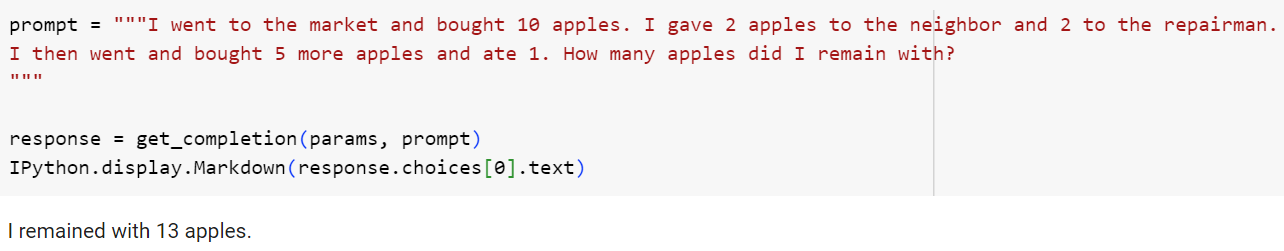

### 2.5 Generate Knowledge Prompting

As an exercise, check examples in our [guide](https://github.com/dair-ai/Prompt-Engineering-Guide/blob/main/guides/prompts-advanced-usage.md#generated-knowledge-prompting) and try them here.

LLMs continue to be improved and one popular technique includes the ability to incorporate knowledge or information to help the model make more accurate predictions.

Using a similar idea, can the model also be used to generate knowledge before making a prediction? That's what is attempted in the [paper](https://arxiv.org/pdf/2110.08387.pdf) by Liu et al. 2022
generate knowledge to be used as part of the prompt. In particular, how helpful is this for tasks such as commonsense reasoning?

Let's try a simple prompt:

In [ ]:
prompt = """Part of golf is trying to get a higher point total than others. True or False?"""

askGPT(prompt)


False. In golf, the goal is to have the lowest score possible, not the highest. Each stroke counts as a point and the fewer strokes you take to complete the course, the better.

haha...😆  This type of mistake reveals the limitations of LLMs to perform tasks that require more knowledge about the world. How do we improve this with knowledge generation?

First, we generate a few "knowledges":

In [ ]:
prompt = """Input: Greece is larger than mexico.
Knowledge: Greece is approximately 131,957 sq km, while Mexico is approximately 1,964,375 sq km, making Mexico 1,389% larger than Greece.

Input: Glasses always fog up.
Knowledge: Condensation occurs on eyeglass lenses when water vapor from your sweat, breath, and ambient humidity lands on a cold surface, cools, and then changes into tiny drops of liquid, forming a film that you see as fog. Your lenses will be relatively cool compared to your breath, especially when the outside air is cold.

Input: A fish is capable of thinking.
Knowledge: Fish are more intelligent than they appear. In many areas, such as memory, their cognitive powers match or exceed those of ’higher’ vertebrates including non-human primates. Fish’s long-term memories help them keep track of complex social relationships.

Input: A common effect of smoking lots of cigarettes in one’s lifetime is a higher than normal chance of getting lung cancer.
Knowledge: Those who consistently averaged less than one cigarette per day over their lifetime had nine times the risk of dying from lung cancer than never smokers. Among people who smoked between one and 10 cigarettes per day, the risk of dying from lung cancer was nearly 12 times higher than that of never smokers.

Input: A rock is the same size as a pebble.
Knowledge: A pebble is a clast of rock with a particle size of 4 to 64 millimetres based on the Udden-Wentworth scale of sedimentology. Pebbles are generally considered larger than granules (2 to 4 millimetres diameter) and smaller than cobbles (64 to 256 millimetres diameter).

Input: Part of golf is trying to get a higher point total than others.
Knowledge:"""

askGPT(prompt, model=chatgpt_model)

In golf, the objective is to complete a round of 18 holes with the fewest number of strokes possible. Unlike many other sports, in golf, a lower score is better. The player with the lowest total score at the end of the round is the winner.

Much better. isn't it ? 😀

Let's run it again to see if we get more knowledge

In [ ]:
prompt = """Input: Greece is larger than mexico.
Knowledge: Greece is approximately 131,957 sq km, while Mexico is approximately 1,964,375 sq km, making Mexico 1,389% larger than Greece.

Input: Glasses always fog up.
Knowledge: Condensation occurs on eyeglass lenses when water vapor from your sweat, breath, and ambient humidity lands on a cold surface, cools, and then changes into tiny drops of liquid, forming a film that you see as fog. Your lenses will be relatively cool compared to your breath, especially when the outside air is cold.

Input: A fish is capable of thinking.
Knowledge: Fish are more intelligent than they appear. In many areas, such as memory, their cognitive powers match or exceed those of ’higher’ vertebrates including non-human primates. Fish’s long-term memories help them keep track of complex social relationships.

Input: A common effect of smoking lots of cigarettes in one’s lifetime is a higher than normal chance of getting lung cancer.
Knowledge: Those who consistently averaged less than one cigarette per day over their lifetime had nine times the risk of dying from lung cancer than never smokers. Among people who smoked between one and 10 cigarettes per day, the risk of dying from lung cancer was nearly 12 times higher than that of never smokers.

Input: A rock is the same size as a pebble.
Knowledge: A pebble is a clast of rock with a particle size of 4 to 64 millimetres based on the Udden-Wentworth scale of sedimentology. Pebbles are generally considered larger than granules (2 to 4 millimetres diameter) and smaller than cobbles (64 to 256 millimetres diameter).

Input: Part of golf is trying to get a higher point total than others.
Knowledge:
"""

askGPT(prompt, model=chatgpt_model)

Incorrect. In golf, the objective is to have the lowest score, not the highest. The player with the fewest strokes at the end of the game is the winner.

We are using the prompt provided in the paper by Liu et al. 2022.

The next step is to integrate the knowledge and get a prediction. I reformatted the question into QA format to guide the answer format.

In [ ]:
prompt = """Question: Part of golf is trying to get a higher point total than others. Yes or No?

Knowledge: The objective of golf is to play a set of holes in the least number of strokes. A round of golf typically consists of 18 holes. Each hole is played once in the round on a standard golf course. Each stroke is counted as one point, and the total number of strokes is used to determine the winner of the game.

Explain and Answer: """

askGPT(prompt, model=chatgpt_model)

No, part of golf is not trying to get a higher point total than others. In golf, the objective is to play a set of holes in the least number of strokes. Each stroke is counted as one point, but the goal is to have the lowest point total possible. The player with the lowest total number of strokes at the end of the round is the winner. Therefore, the focus is on achieving a lower point total than others, not a higher one.

For further details, check out the paper https://arxiv.org/pdf/2110.08387.pdf

### **2.6 Chain of Density**

We all know LLM’s can summarise things and we know we can control summary length, topics covered, and style, however, an important but overlooked aspect is information density – (how much detail to include within a constrained length). The ideal goal is a summary that is informative yet clear. Striking this balance can be challenging, that’s where a new technique called Chain of Density (CoD) prompting comes in! It aims to help address this tradeoff.

* Chain of Density (CoD) is a novel prompt engineering technique designed for optimizing summarization tasks in Large Language Models like GPT-4
* The technique deals with controlling the information density in the generated summary, providing a balanced output that is neither too sparse nor too dense
* CoD has practical implications for data science, especially in tasks that require high-quality, contextually appropriate summarizations

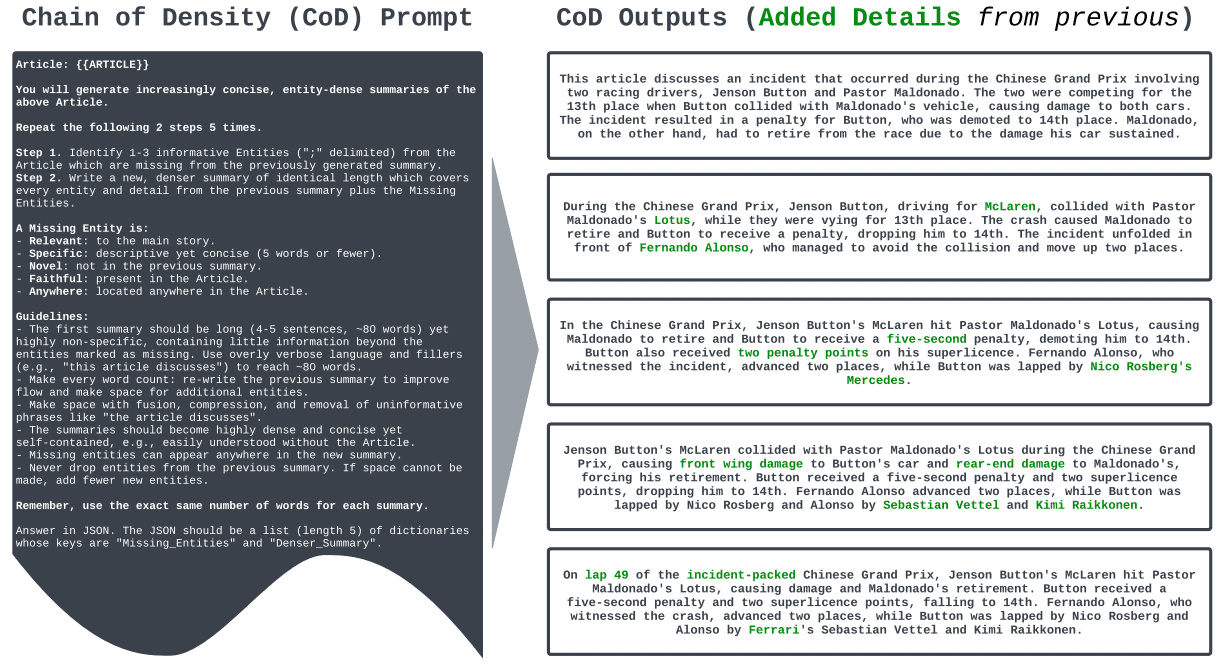

Source, from the original paper [From Sparse to Dense: GPT-4 Summarization with Chain of Density Prompting](https://arxiv.org/abs/2309.04269)  

In [ ]:
prompt = """Article:

{{ In the wake of President Biden's executive order on Monday, AI companies and industry leaders have weighed in on this watershed moment in AI regulation. But the biggest player in the AI space, OpenAI, has been conspicuously quiet.

The Biden-Harris administration's far-ranging executive order addressing the risks of AI builds upon voluntary commitments secured by 15 leading AI companies. OpenAI was among the first batch of companies to promise the White House safe, secure, and trustworthy development of its AI tools. Yet the company hasn't issued any statement on its website or X (formerly known as Twitter). CEO Sam Altman, who regularly shares OpenAI news on X, hasn't posted anything either.

OpenAI has not responded to Mashable's request for comment.

SEE ALSO: White House announces new AI initiatives at Global Summit on AI Safety
Of the 15 companies that made a voluntary commitment to the Biden Administration, the following have made public statements, and all of which expressed support for the executive order: Adobe, Amazon, Anthropic, Google, IBM, Microsoft, Salesforce, and Scale AI. Nvidia decline to comment.

In addition to crickets from OpenAI, Mashable has yet to hear from Cohere, Inflection, Meta, Palantir, and Stability AI. But OpenAI and Altman's publicity tour proclaiming the urgent risks of AI and the need for regulation makes the company's silence all the more noticeable.



Altman has been vocal about the threat that generative AI made by his own company poses. In May, Altman, along with technology pioneers Geoffrey Hinton and Bill Gates signed an open letter, stating, "Mitigating the risk of extinction from AI should be a global priority alongside other societal-scale risks such as pandemics and nuclear war."

At a senate hearing in May, Altman expressed the need for AI regulation: "I think if this technology goes wrong, it can go quite wrong, and we want to be vocal about that," said Altman in response to inquiry from Sen. Blumenthal, D-CT about the threat of superhuman machine intelligence.


So far, cooperation with lawmakers and world leaders has worked in OpenAI's favor. Altman participated in the Senate's bipartisan closed-door AI summit, giving OpenAI a seat at the table for formulating AI legislation. Shortly after Altman's testimony, leaked documents from OpenAI showed the company lobbying for weaker regulation in the European Union.

It's unclear where OpenAI stands on the executive order, but open-source advocates say the company already has too much lobbying influence. On Wednesday, the same day as the AI Safety Summit in the U.K., more than 70 AI leaders issued a joint statement calling for a more transparent approach to AI regulation. "The idea that tight and proprietary control of foundational AI models is the only path to protecting us from society-scale harm is naive at best, dangerous at worst," said the statement.

Meta Chief AI Scientist Yann LeCun, one of the signatories, doubled down on this sentiment on X (formerly known as Twitter) by calling out OpenAI, DeepMind (a subsidiary of Google), and Anthropic for using fear-mongering to ensure favorable outcomes. "[Sam] Altman, [Demis] Hassabis, and [Dario] Amodei are the ones doing massive corporate lobbying at the moment. They are the ones who are attempting to perform a regulatory capture of the AI industry," he posted.


Anthropic and Google leadership have both provided statements supporting the executive order, leaving OpenAI the lone company accused of regulatory capture yet to issue any comment.

What could the executive order mean for OpenAI?
Many of the testing provisions in the EO relate to huge foundation models not yet on the market and future development of AI systems, suggesting consumer-facing tools like OpenAI's ChatGPT won't be impacted much.

"I don't think we're likely to see any immediate changes to any of the generative AI tools available to consumers," said Jake Williams, former US National Security Agency (NSA) hacker and Faculty member at IANS Research. "OpenAI, Google, and others are definitely training foundation models and those are specifically called out in the EO if they might impact national security."

So, whatever OpenAI is working on might be subjected to government testing.

In terms of how the executive order might impact directly OpenAI, Beth Simone Noveck, director of the Burnes Center for Social Change, said it could slow down the pace of new products and updates being released and companies will have to invest more in research and development and compliance.

"Companies developing large-scale language models (e.g. ChatGPT, Bard and those trained on billions of parameters of data) will be required to provide ongoing information to the federal government, including details of how they test their platforms," said Noveck, who previously served as the first United States Deputy Chief Technology Officer under President Obama.

More than anything, the executive order signals an alignment with growing consumer expectations for greater control and protection of their personal data, said Avani Desai, CEO of Schellman, a top CPA firm that specializes in IT audit and cybersecurity.

"This is a huge win for privacy advocates as the transparency and data privacy measures can boost user confidence in AI-powered products and services," Desai said.

So while the consequences of the executive order may not be immediate, it squarely applies to OpenAI's tools and practices. You'd think OpenAI might have something to say about that. }}

You will generate increasingly concise, entity-dense summaries of the above Article.

Repeat the following 2 steps 5 times.

Step 1. Identify 1-3 informative Entities ("; " delimited) from the Article which are missing from the previously generated summary.
Step 2. Write a new, denser summary of identical length which covers every entity and detail from the previous summary plus the Missing Entities.

A Missing Entity is:
- Relevant: to the main story.
- Specific: descriptive yet concise (5 words or fewer).
- Novel: not in the previous summary.
- Faithful: present in the Article.
- Anywhere: located anywhere in the Article.

Guidelines:
- The first summary should be long (4-5 sentences, ~80 words) yet highly non-specific, containing little information beyond the entities marked as missing. Use overly verbose language and fillers (e.g., "this article discusses") to reach ~80 words.
- Make every word count: rewrite the previous summary to improve flow and make space for additional entities.
- Make space with fusion, compression, and removal of uninformative phrases like "the article discusses".
- The summaries should become highly dense and concise yet self-contained, e.g., easily understood without the Article.
- Missing entities can appear anywhere in the new summary.
- Never drop entities from the previous summary. If space cannot be made, add fewer new entities.

Remember, use the exact same number of words for each summary.

Answer in JSON. The JSON should be a list (length 5) of dictionaries whose keys are "Missing_Entities" and "Denser_Summary"."""

In [ ]:
askGPT(prompt, max_tokens=1000)

[
{
"Missing_Entities": "President Biden's executive order; OpenAI; AI regulation",
"Denser_Summary": "This article discusses President Biden's recent executive order concerning artificial intelligence (AI) regulation. The piece notes that OpenAI, a significant player in the AI industry, has not issued any public statement regarding the order, despite having previously committed to safe and trustworthy AI development. The article suggests that this silence is notable, particularly given OpenAI's previous outspokenness on the potential risks of AI and the importance of regulation."
},
{
"Missing_Entities": "Sam Altman; AI Safety Summit; Meta",
"Denser_Summary": "President Biden's AI regulation executive order has been met with silence from OpenAI and its CEO, Sam Altman, despite their previous commitments to safe AI. The AI Safety Summit saw over 70 AI leaders call for transparent AI regulation, criticizing the control of foundational AI models by companies like OpenAI. Meanwhile, Meta, another major AI company, has also refrained from commenting on the order."
},
{
"Missing_Entities": "Senate hearing; Executive order impact; Consumer-facing tools",
"Denser_Summary": "OpenAI's silence on President Biden's AI regulation executive order, despite CEO Sam Altman's vocal support for regulation at a Senate hearing, stands out amidst calls for transparency at the AI Safety Summit. The executive order's impact seems focused on large foundation models, suggesting OpenAI's consumer-facing tools like ChatGPT may not be significantly affected. Meta, another AI player, also remains silent."
},
{
"Missing_Entities": "Government testing; Data privacy; ChatGPT",
"Denser_Summary": "OpenAI, under CEO Sam Altman, is conspicuously silent on President Biden's AI regulation executive order, despite its potential implications for large foundation models, possibly subjecting OpenAI's projects to government testing. The order, focusing on data privacy, may not significantly affect consumer-facing tools like OpenAI's ChatGPT. Amidst transparency calls at the AI Safety Summit, Meta also refrains from comment."
},
{
"Missing_Entities": "Executive order's consequences; User confidence; AI-powered products",
"Denser_Summary": "Despite potential government testing of large foundation models due to President Biden's AI regulation order, OpenAI and CEO Sam Altman remain silent. The order, aiming to boost user confidence in AI-powered products through data privacy, may not affect consumer tools like OpenAI's ChatGPT significantly. Amidst calls for transparency at the AI Safety Summit, Meta also remains unresponsive."
}
]

In [ ]:
from langchain.chat_models import ChatOpenAI
llm = ChatOpenAI(model="gpt-4",max_tokens=500)
# Passing the CoD prompt as input to GPT-4
IPython.display.Markdown(llm.invoke(prompt).content)

[
{
"Missing_Entities": "OpenAI; President Biden's executive order; AI regulation",
"Denser_Summary": "This article discusses the recent executive order on AI regulation issued by President Biden, which received a commitment from leading AI companies including OpenAI. However, OpenAI has remained unusually silent, not issuing any statement or response to inquiries about the executive order, despite their previous engagement with AI regulation issues."
},
{
"Missing_Entities": "Sam Altman; Adobe, Amazon, Anthropic, Google, IBM, Microsoft, Salesforce, Scale AI; voluntary commitment",
"Denser_Summary": "OpenAI's CEO, Sam Altman, despite advocating for AI regulation, has not commented on President Biden's executive order. OpenAI, along with Adobe, Amazon, Anthropic, Google, IBM, Microsoft, Salesforce, and Scale AI, was part of the initial set of companies that voluntarily committed to the White House's AI regulation initiative. Yet, OpenAI's silence raises questions."
},
{
"Missing_Entities": "AI Safety Summit; leaked documents; lobbying for weaker regulation",
"Denser_Summary": "Sam Altman, after participating in the AI Safety Summit and lobbying for weaker AI regulation in the EU, as leaked documents show, has not yet commented on President Biden's executive order. OpenAI, among companies including Adobe, Amazon, Anthropic, Google, IBM, Microsoft, Salesforce, and Scale AI that pledged support, remains conspicuously silent."
},
{
"Missing_Entities": "Yann LeCun; regulatory capture accusation; ChatGPT",
"Denser_Summary": "Despite accusations of regulatory capture from Yann LeCun, OpenAI's CEO Sam Altman remains silent on President Biden's executive order on AI regulation. The order impacts large-scale language models like OpenAI's ChatGPT, and comes after Altman's lobbying for weaker regulation, as revealed by leaked documents, and participation in the AI Safety Summit."
},
{
"Missing_Entities": "Beth Simone Noveck; Avani Desai; privacy advocates",
"Denser_Summary": "Experts like Beth Simone Noveck and Avani Desai suggest President Biden's executive order, despite OpenAI CEO Sam Altman's silence, could slow AI product releases, increase R&D costs, and boost user data protection. Despite regulatory capture accusations from Yann LeCun and Altman's lobbying revealed in leaked documents, privacy advocates view the order

We are developing a simple application that's able to reason about the question being asked through code.

Specifically, the application takes in some data and answers a question about the data input. The prompt includes a few exemplars which are adopted from [here](https://github.com/reasoning-machines/pal/blob/main/pal/prompt/penguin_prompt.py).  

In [ ]:
from langchain.schema import HumanMessage
from langchain_community.chat_models import AzureChatOpenAI

In [ ]:
model = AzureChatOpenAI(
    openai_api_version=os.getenv("AZURE_API_VERSION"),
    azure_deployment=gpt4turbo_model,
)

In [ ]:
message = HumanMessage(
    content="Translate this sentence from English to Tamil. I love you."
)
model([message])

AIMessage(content='நான் உன்னை காதலிக்கிறேன்.')

Exercise: Try a different question and see what's the result.

In [ ]:
# for LangChain
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["SERPAPI_API_KEY"] = os.getenv("SERPER_API_KEY")

In [ ]:
!pip install google-search-results

In [ ]:
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from langchain.agents import AgentType
from langchain.llms import OpenAI

In [ ]:


llm = OpenAI(temperature=0.6)

tools = load_tools(["serpapi", "llm-math"], llm=llm)

agent = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

In [ ]:
print(agent.agent.llm_chain.prompt.template)


---

In [ ]:
agent.run("My monthly salary is 10000 INR per month. How much is my total salary in INR if I work for 10 months?")



> Entering new AgentExecutor chain...
 I need to calculate the total salary
Action: Calculator
Action Input: 10000*10
Observation: Answer: 100000
Thought: I now know the final answer
Final Answer: My total salary in INR for 10 months is 100000.

> Finished chain.


'My total salary in INR for 10 months is 100000.'

In [ ]:
agent.run("My monthly salary is 10000 USD per month. How much is my total salary in INR if I work for 10 months?")



> Entering new AgentExecutor chain...
 I need to calculate the conversion rate from USD to INR.
Action: Search
Action Input: Conversion rate USD to INR
Observation: 83.27 Indian Rupee
Thought: I need to calculate the total salary in INR.
Action: Calculator
Action Input: 10000*10*83.27
Observation: Answer: 8327000.0
Thought: I now know the final answer.
Final Answer: My total salary in INR is 8327000.0 if I work for 10 months.

> Finished chain.


'My total salary in INR is 8327000.0 if I work for 10 months.'

In [ ]:
agent.run("What is the first week collection of Leo? Did Leo beat Jailer in its collections?")



> Entering new AgentExecutor chain...
 I need to know the box office collections of both movies
Action: Search
Action Input: "Leo box office collections"
Observation: [{'title': "'Leo' box office collection day 14: Movie mints Rs 3 crore, inches towards Rs 600 crore collection", 'link': 'https://m.timesofindia.com/entertainment/tamil/movies/box-office/leo-box-office-collection-day-14-movie-mints-rs-3-crore-inches-towards-rs-600-crore-collection/articleshow/104906872.cms', 'source': 'The Times of India', 'date': '27 mins ago', 'thumbnail': 'https://serpapi.com/searches/6544c153aef264320e01ee22/images/cffe50bbe276342fbf45621d8d7a0e3f376b361fef086b4b.jpeg'}, {'title': 'Leo box office collection day 15: Vijay-starrer crosses Rs 553 crore worldwide, can beat Rajinikanth’s Jailer record with this number', 'link': 'https://indianexpress.com/article/entertainment/tamil/leo-box-office-collection-day-15-vijay-film-rs-553-crore-worldwide-jailer-record-9011400/', 'source': 'The Indian Express', 

'Yes, Leo has beaten Jailer in its collections, having grossed Rs 553 crore worldwide.'